<a href="https://colab.research.google.com/github/Toludorcas/codsoft_taskno/blob/main/SALES_PREDICTION_USING_PYTHON_BY_ONI_TOLUWALOPE_DORCAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Loading the dataset

In [2]:
df = pd.read_csv ("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## EXPLORATORY DATA ANALYSIS

In [4]:
df.head ()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail ()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.shape

(200, 4)

In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.describe ()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.isnull ()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
df.duplicated().sum()

0

## DATA VISUALIZATION

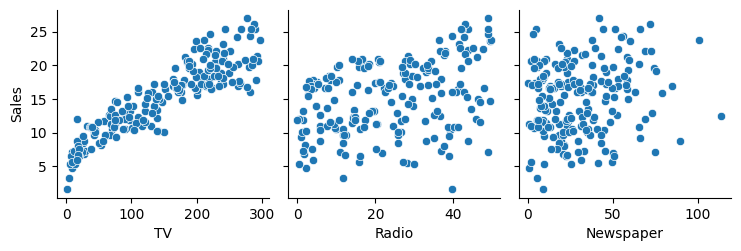

In [13]:
sns.pairplot (df, hue = None, x_vars = ['TV','Radio', 'Newspaper'], y_vars = ['Sales'], kind = 'scatter')
plt.show()

<Axes: ylabel='Frequency'>

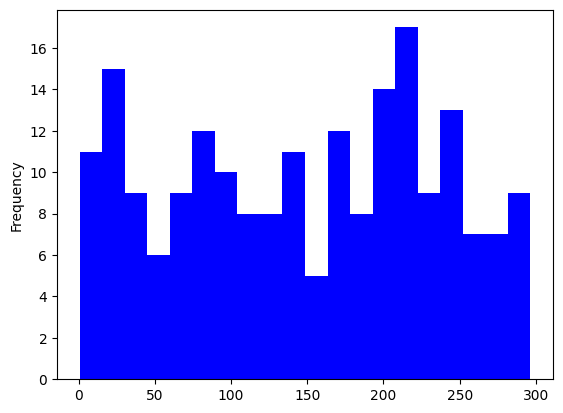

In [14]:
df['TV'].plot (kind = 'hist', bins = 20, color = 'blue',
                  xlabel = 'TV',
                  ylabel = 'Frequency')

<Axes: ylabel='Frequency'>

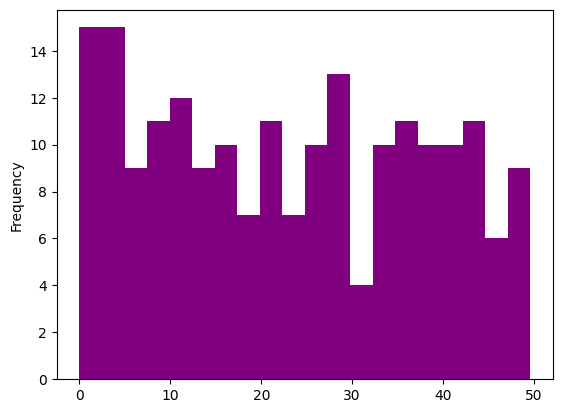

In [15]:
df['Radio'].plot (kind = 'hist', bins = 20, color = 'purple',
                  xlabel = 'Radio',
                  ylabel = 'Frequency')

<Axes: ylabel='Frequency'>

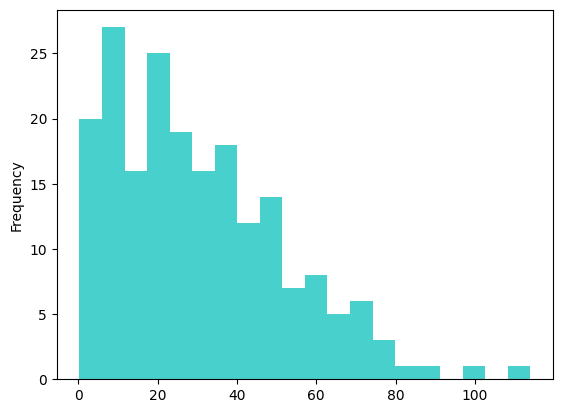

In [16]:
df['Newspaper'].plot (kind = 'hist', bins = 20, color = 'mediumturquoise',
                  xlabel = 'Newspaper',
                  ylabel = 'Frequency')

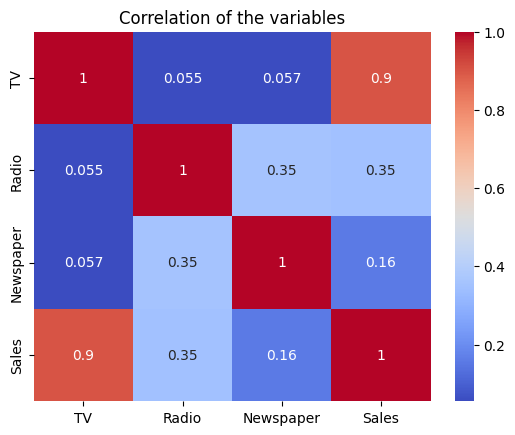

In [17]:
# Heatmap Correlation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm')
plt.title("Correlation of the variables")
plt.show()

From the Correlation matrix it can be deduced that TV has the highest correlation with sales followed by Radio and Newspapers has the lowest.

## MODEL TRAINING AND EVALUATION

In [18]:
X = df.drop ('Sales', axis = 1)

In [19]:
y_true = df['Sales']

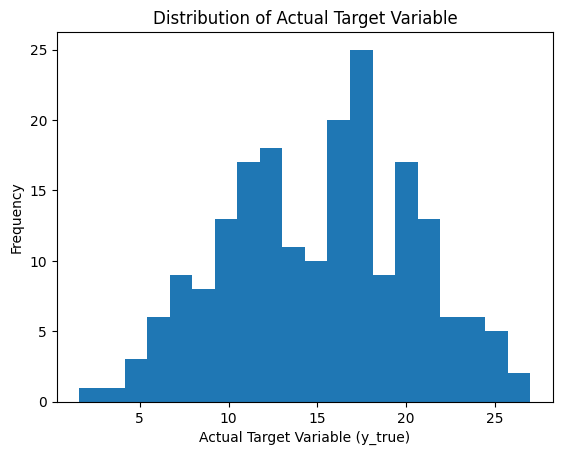

In [20]:
# Visualize the distribution of y_true
plt.hist (y_true, bins = 20)
plt.xlabel ('Actual Target Variable (y_true)')
plt.ylabel ('Frequency')
plt.title ('Distribution of Actual Target Variable')
plt.show ()

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split (X, y_true, test_size = 0.2, random_state = 42)

# Linear Regression Model

In [22]:
# Create the Linear Regression model
model = LinearRegression()

In [23]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Making Predictions
y_pred = model.predict(X_test)

In [25]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [26]:
# Evaluate the linear regression model using suitable metrics like Mean Squared Error, Mean Absolute Error, R-squared (R2) score
mse = mean_squared_error (y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.9077569102710896


In [27]:
mae = mean_absolute_error (y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.2748262109549338


In [28]:
r2 = r2_score (y_test, y_pred)
print(f"r2_score: {r2}")

r2_score: 0.9059011844150826


# Gradient Boosting Regressor Model

In [29]:
# Create the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)

In [30]:
# Training the model
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [31]:
y_pred = model.predict(X_test)
y_pred

array([17.41885264, 23.21246384, 20.33085714,  6.19888096, 23.76475325,
       13.67283298, 22.42440391,  9.63988809, 16.7187096 , 16.08009996,
        7.93712139,  9.82573068, 17.78935507,  3.94279764, 10.95468295,
       15.77188711,  6.14018912, 17.63011564, 11.29922659, 19.73754635,
       20.05817414, 13.75630289,  9.79285407, 22.62150403, 10.94132614,
        9.22281093, 21.63585825, 13.34708164, 11.07009594,  5.81824453,
       16.75564427, 11.72090589, 22.98218417, 10.01539041, 20.10903675,
       20.41852803, 12.14058471, 19.69215013, 11.97102877,  7.51591072])

In [32]:
#Evaluate the Gradient boosting regressor model using suitable metrics like Mean Squared Error, Mean Absolute Error, R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.255260979893099


In [33]:
mae = mean_absolute_error (y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.830119958670547


In [34]:
r2 = r2_score (y_test, y_pred)
print(f"r2_score: {r2}")

r2_score: 0.9593781134039533


# Decision Tree Regressor Model

In [35]:
# Create the Decision Tree Regressor model
regressor = DecisionTreeRegressor(max_depth = 3, random_state = 42)

In [36]:
# Train the model on the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [37]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)
y_pred

array([19.27608696, 21.95714286, 19.27608696,  7.75789474, 21.95714286,
       14.5       , 21.95714286, 11.60810811, 17.12      , 19.27608696,
        3.2       , 11.60810811, 17.12      ,  7.75789474, 11.60810811,
       17.12      ,  7.75789474, 19.27608696, 11.60810811, 19.27608696,
       19.27608696, 14.5       ,  7.75789474, 19.27608696, 11.60810811,
       11.60810811, 21.95714286, 11.60810811, 11.60810811,  3.2       ,
       17.12      , 11.60810811, 21.95714286,  7.75789474, 19.27608696,
       19.27608696, 14.5       , 19.27608696, 11.60810811,  7.75789474])

In [38]:
# Evaluate the Decision Tree regressor model using suitable metrics like Mean Squared Error, Mean Absolute Error, R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.19733253893104


In [39]:
mae = mean_absolute_error (y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.7668252387726064


In [40]:
r2 = r2_score (y_test, y_pred)
print(f"r2_score: {r2}")

r2_score: 0.8318075233913667


In Conclusion
* Smaller Mean Absolute Error (MAE) values are better, as they indicate that the model's predictions, are closer to the actual values.
* Mean Squared Error (MSE) is a measure of the model's accuracy and lower values of MSE indicate better model performance.
* Higher R-Squared (R2) values indicate that a larger proportion of the variance in the target variable is explained by the model, suggesting a better fit.

Looking at this critically, out of the three models' predictions using the suitable metrics, only Gradient Boosting Regressor model has the lowest MAE and MSE values. It also has higher R2 values. Gradient Boosting Regressor is the best model with better fit and performance.